In [1]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
file_path = 'cleaned_review_details.csv'
reviews_df = pd.read_csv(file_path)

# Select relevant columns and drop missing values
reviews_df = reviews_df[['review_text', 'review_rating']].dropna()

In [3]:
# Initialize Hugging Face sentiment analysis pipeline (BERT-based model)
sentiment_analyzer = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

In [4]:
# Apply sentiment analysis to the review text
def get_transformer_sentiment(text):
    result = sentiment_analyzer(text)[0]  # Get the first result
    label = result['label']
    # Map labels like '1 star', '2 stars' to 'Negative', 'Neutral', or 'Positive'
    if label in ['1 star', '2 stars']:
        return 'Negative'
    elif label == '3 stars':
        return 'Neutral'
    else:
        return 'Positive'

reviews_df['bert_sentiment_label'] = reviews_df['review_text'].apply(get_transformer_sentiment)

In [5]:
# Map review_rating to sentiment labels for comparison
def categorize_rating(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

reviews_df['rating_label'] = reviews_df['review_rating'].apply(categorize_rating)

In [6]:
# Evaluate the model
print("Classification Report (BERT Sentiment):")
print(classification_report(reviews_df['rating_label'], reviews_df['bert_sentiment_label']))

Classification Report (BERT Sentiment):
              precision    recall  f1-score   support

    Negative       0.59      0.78      0.67       224
     Neutral       0.23      0.39      0.29       103
    Positive       0.98      0.91      0.94      1924

    accuracy                           0.87      2251
   macro avg       0.60      0.69      0.64      2251
weighted avg       0.91      0.87      0.88      2251



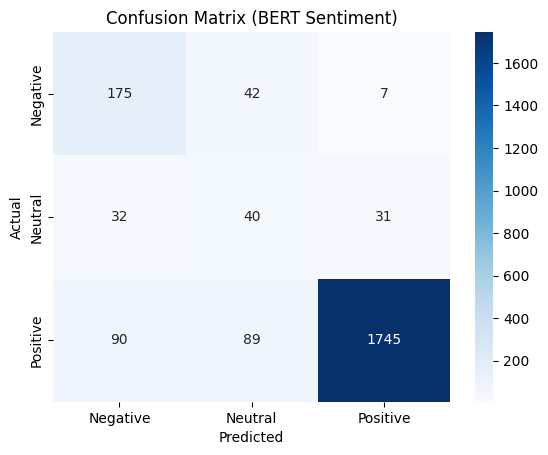

In [7]:
# Confusion Matrix
conf_matrix = confusion_matrix(reviews_df['rating_label'], reviews_df['bert_sentiment_label'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix (BERT Sentiment)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
reviews_df.to_csv('updated_reviews.csv', index=False)

In [9]:
reviews_df.head(20)

,review_text,review_rating,bert_sentiment_label,rating_label
0,"As you get older, you know what you like and w...",5,Positive,Positive
1,Three gigantic marmite jars that will last pro...,5,Positive,Positive
2,Excellent,4,Positive,Positive
3,A great flavour top - up for slow cooking.,5,Positive,Positive
4,Does what is says it does,5,Positive,Positive
5,Excellent,4,Positive,Positive
6,Three gigantic marmite jars that will last pro...,5,Positive,Positive
7,A great flavour top - up for slow cooking.,5,Positive,Positive
8,Excellent item.Good for men,4,Positive,Positive
9,Thank you I’m very happy,5,Positive,Positive


In [10]:
reviews_df.tail(20)

,review_text,review_rating,bert_sentiment_label,rating_label
2231,Great money saving subscription,5,Positive,Positive
2232,Pleasing aroma after laundering clothes ect Va...,5,Positive,Positive
2233,Taste fine.,4,Positive,Positive
2234,These melted easily into the sauce but was ove...,1,Negative,Negative
2235,I was disappointed with these. The size seemed...,2,Negative,Negative
2236,It would be good to point out that Cif does te...,3,Negative,Neutral
2237,Will quite happily buy these instead of the us...,5,Positive,Positive
2238,Myself and my grandchildren love these lollies...,5,Positive,Positive
2239,Its been a while since I had the real thing an...,5,Positive,Positive
2240,"Love this shower gel, great for sensitive skin...",5,Positive,Positive


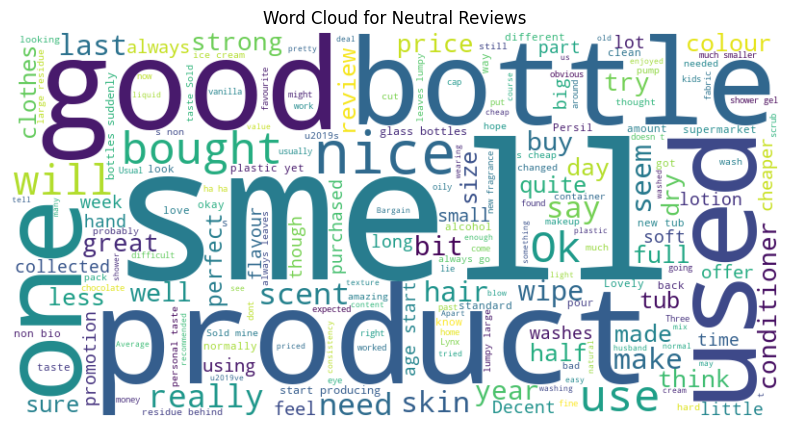

In [11]:
from wordcloud import WordCloud
# Generate Word Clouds for Positive, Negative, and Neutral Sentiments

# Filter reviews by sentiment label
positive_reviews = reviews_df[reviews_df['bert_sentiment_label'] == 'Positive']['review_text']
negative_reviews = reviews_df[reviews_df['bert_sentiment_label'] == 'Negative']['review_text']
neutral_reviews = reviews_df[reviews_df['bert_sentiment_label'] == 'Neutral']['review_text']

# Create a function to generate and display the word cloud
def generate_word_cloud(text_data, title):
    text = ' '.join(text_data)  # Combine all review texts into one string
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title(title)
    plt.show()

# Generate Word Clouds for Positive, Negative, and Neutral
# generate_word_cloud(positive_reviews, 'Word Cloud for Positive Reviews')
# generate_word_cloud(negative_reviews, 'Word Cloud for Negative Reviews')
generate_word_cloud(neutral_reviews, 'Word Cloud for Neutral Reviews')